In [31]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd

In [33]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [35]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [36]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [37]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [38]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the result
# Need to find the last date in data
rs = session.query(func.max(Measurement.date))
Last_date = rs[0][0]
print(Last_date)


2017-08-23


In [41]:
# Pulling data for 12 months from last date
first_date = dt.date(2017,8, 23) - dt.timedelta(days=365)

one_year_precipitation = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date > first_date).\
                        order_by(Measurement.date).all()
print(one_year_precipitation)

[('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.02), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.05), ('2016-08-31', 0.13), (

In [42]:
# Calculate the date 1 year ago from today
# Need to figure out today then subtract 365 days - note that it says TODAY in instructions!
Today = pd.to_datetime('now')
YrFromToday = Today - dt.timedelta(days=365)
print(YrFromToday)

2017-09-08 23:44:32.302000


In [43]:
# If needed I also did one year from last date in measurements
base_date = dt.datetime.strptime("2017-08-23", "%Y-%m-%d")
YrFrombd = base_date - dt.timedelta(days=365)
print(YrFrombd)

2016-08-23 00:00:00


In [44]:
# Perform a query to retrieve the data and precipitation scores

recent_prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= YrFrombd).\
    order_by(Measurement.date).all()
print(recent_prcp_data)



[('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.02), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.05), ('2016-08-31', 0.13), (

In [45]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

df = pd.DataFrame(recent_prcp_data).dropna()
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df.head()

prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24  1.22
2016-08-24  2.15

In [46]:
# Sort the dataframe by date
sort_df = df.sort_values(by='date',ascending=True)
sort_df.head(10)

prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.06
2016-08-25  0.21
2016-08-25  0.00
2016-08-25  0.11

<IPython.core.display.Javascript object>


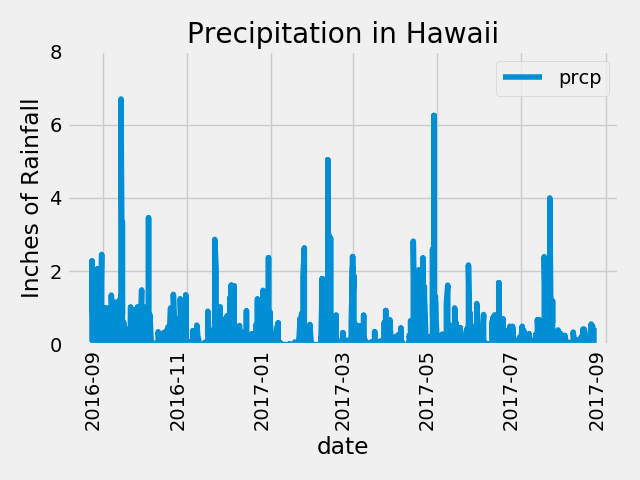

In [47]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
sort_df.plot()
plt.xticks(rotation=90)
plt.ylim(0,8)
plt.title("Precipitation in Hawaii")
plt.ylabel("Inches of Rainfall")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
plt.savefig("Precipitation_in_Hawaii.png")

In [48]:
# Use Pandas to calculate the summary statistics for the precipitation data
sort_df.describe()

prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

In [49]:
# How many stations are available in this dataset?
session.query(Measurement.station).distinct().count()

9

In [50]:
# What are the most active stations?
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.prcp))\
             .group_by(Measurement.station)\
             .order_by(func.count(Measurement.prcp).desc())
for station in station_count:
    print(station)
    
top_station = station_count[0][0]

('USC00519281', 2772)
('USC00513117', 2696)
('USC00519397', 2685)
('USC00519523', 2572)
('USC00516128', 2484)
('USC00514830', 1937)
('USC00511918', 1932)
('USC00517948', 683)
('USC00518838', 342)


In [51]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

[r for r in session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)).filter(
    Measurement.station == top_station)]

[(54.0, 85.0, 71.66378066378067)]

USC00519281


<IPython.core.display.Javascript object>


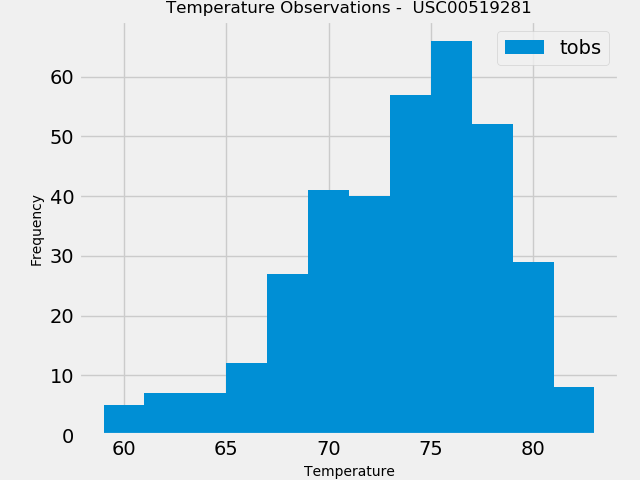

In [52]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
q = [r for r in session.query(
    Measurement.station,
        func.count(Measurement.tobs)
        ).group_by(Measurement.station
            ).order_by(func.count(Measurement.tobs).desc()).first()]
highest_tobs = q[0]
print(highest_tobs)

tobs_q = session.query(Measurement.tobs
                      ).filter(Measurement.date >= YrFrombd).filter(Measurement.station == highest_tobs).all()
tobs_df = pd.DataFrame(tobs_q)
tobs_df.head()
tobs_df.plot.hist(bins=12)
plt.legend(loc='upper right')
plt.tight_layout()
plt.title("Temperature Observations -  USC00519281", fontsize=12)
plt.xlabel("Temperature", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.show()
plt.savefig("Temperature Observations.png")


In [53]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [54]:
class Temp():
    def __init__(self, minimum, average, maximum):
        self.minimum = minimum
        self.average = average
        self.maximum = maximum
        
def calc_temps(start_date, end_date):
    minimum = session.query(func.min(Measurement.tobs)).filter(Measurement.date.between(start_date, end_date)).scalar()
    print(f"Minimum temp: {minimum}")
    average = session.query(func.round(func.avg(Measurement.tobs))).filter(Measurement.date.between(start_date, end_date)).scalar()
    print(f"Average temp: {average}")
    maximum = session.query(func.max(Measurement.tobs)).filter(Measurement.date.between(start_date, end_date)).scalar()
    print(f"Maximum temp: {maximum}")
    
    result = [{"Minimum":minimum},{"Maximum":maximum},{"Average":average}]
    result = Temp(minimum, average, maximum)
    return result 

trip = calc_temps('2012-02-28', '2012-03-05')
trip.minimum, trip.average, trip.maximum

Minimum temp: 62.0
Average temp: 70.0
Maximum temp: 74.0


(62.0, 70.0, 74.0)

In [55]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
previousYearTemps = calc_temps('2011-02-28','2011-03-05')
previousYearTemps.minimum, previousYearTemps.average, previousYearTemps.maximum

Minimum temp: 61.0
Average temp: 70.0
Maximum temp: 75.0


(61.0, 70.0, 75.0)

<IPython.core.display.Javascript object>


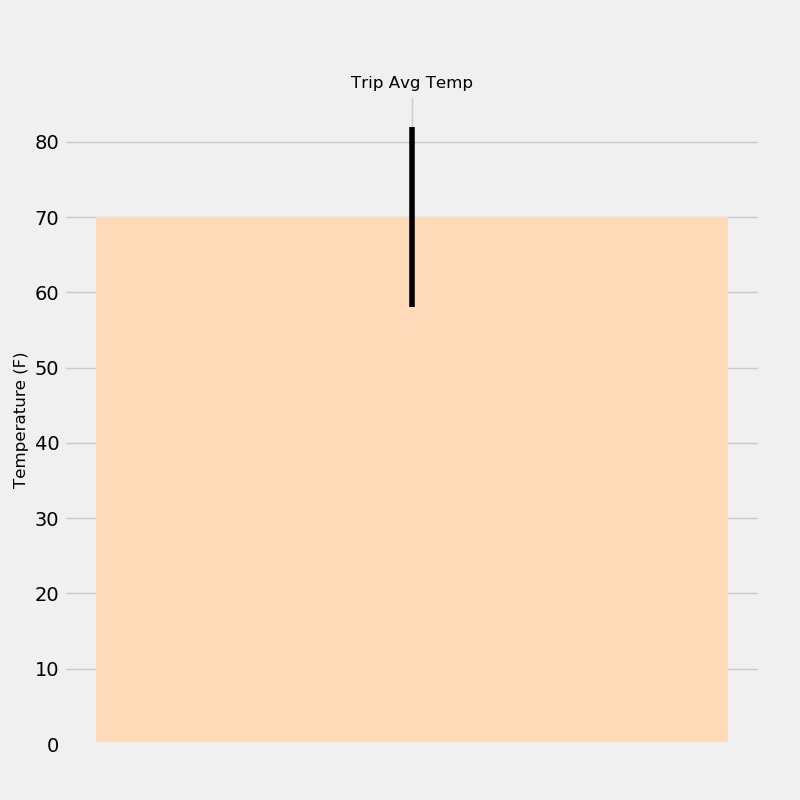

In [56]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(8,8))
plt.title('Trip Avg Temp',fontsize=12)
plt.ylabel('Temperature (F)',fontsize=12)
plt.bar(1, trip.average, yerr = (trip.maximum - trip.minimum), color='peachpuff', tick_label = "")

# Save an image of the chart and print to screen
plt.savefig("TripAvgTemp.png")
plt.show()

In [58]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def collect_rainfall(start_date, end_date):
    return session.query(Measurement.station,
                         Station.name,
                         Measurement.prcp,
                         Station.latitude,
                         Station.longitude,
                         Station.elevation).\
                            group_by(Measurement.station).\
                            join(Station, Measurement.station == Station.station).\
                            filter(Measurement.date >= start_date).\
                            filter(Measurement.date <= end_date).\
                            order_by(func.sum(Measurement.prcp).label("TotalPrecip").desc())
                                     
collect_rainfall('2011-02-28', '2011-03-05')


## Optional Challenge Assignment

In [59]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
